






















































































# **Import Libraries and Mount**


In [ ]:
!pip install clearml

     |████████████████████████████████| 1.0 MB 12.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 


In [ ]:
%%bash

export api=`cat <<EOF
api {
    # Stef Telford's workspace
    web_server: https://app.community.clear.ml
    api_server: https://api.community.clear.ml
    files_server: https://files.community.clear.ml
    credentials {
        "access_key" = "P3HU9EH0MOMZ4Z8WUNT0"
        "secret_key" = "7EaR8xZoHSKNm3HGzcHhCwcWnulmmmDOtLzj0WICVtwXbw5fYZ"
    }
}
EOF
`
echo "$api" > /root/clearml.conf

In [ ]:
from clearml import Task
task = Task.init(project_name="SemanticSeg", task_name="my task")

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgHw_SDHmCMrlAOlKUiRzUdHR3r_qWxeVxH7w-ffaWPlMZFa1V6_P0
Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Conv2D, concatenate, Activation, MaxPooling2D, UpSampling2D, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split
from numpy import savez
from glob import glob
import cv2
import matplotlib.pyplot as plt

In [ ]:
print(os.listdir('/content/gdrive/MyDrive/Colab_Notebooks/Semantic_Segmentation/Semantic_Segmentation/dataA/dataA'))

['CameraSeg', 'CameraRGB']


# **Load data**

In [ ]:
base_path = "/content/gdrive/MyDrive/Colab_Notebooks/Semantic_Segmentation/Semantic_Segmentation/dataA/dataA/CameraRGB"
seg_path = "/content/gdrive/MyDrive/Colab_Notebooks/Semantic_Segmentation/Semantic_Segmentation/dataA/dataA/CameraSeg"
image_paths = os.listdir(base_path)
print('{} images'.format(len(image_paths)))
print('{} masks'.format(len(seg_path)))

105 images
105 masks


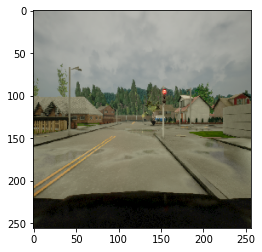

In [ ]:
def load_image(path):
    img = load_img(path, target_size = (256,256)) #Load ảnh
    img_arr = img_to_array(img)/255 # Chuyển anh sang dạng ma trận và normalize ảnh

    return img_arr 

index  = random.randint(0, len(image_paths))
img = load_image(os.path.join(base_path, image_paths[index]))
plt.imshow(img)

In [ ]:
def load_mask(path):
    mask = load_image(path)*255
    mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(mask.shape[0], mask.shape[1])
    mask = np.where(mask == 7, 1, 0)
    return mask

mask = load_mask(os.path.join(seg_path, image_paths[index]))
plt.imshow(mask, cmap = 'gray')
plt.title('Image mask')

NameError: ignored

In [ ]:
import os 
import random
import pandas as pd 
import numpy as np    
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.python.keras.backend import concatenate
from tensorflow.python.keras.layers.convolutional import Conv2D, Conv2DTranspose
from tensorflow.python.keras.layers.core import Lambda
from tensorflow.python.keras.layers.pooling import MaxPool2D, MaxPooling2D
plt.style.use("ggplot")

import cv2
from tqdm import tnrange, tqdm_notebook
from glob import glob
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



5000 5001


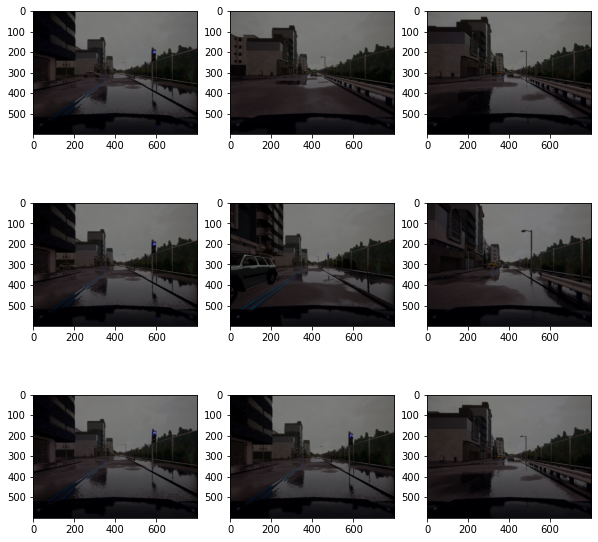

In [ ]:


mask_files = glob('/content/gdrive/MyDrive/Colab_Notebooks/Semantic_Segmentation/Semantic_Segmentation/*/*/CameraSeg/*')
train_files = glob('/content/gdrive/MyDrive/Colab_Notebooks/Semantic_Segmentation/Semantic_Segmentation/*/*/CameraRGB/*')
print(len(train_files), len(mask_files))

rows, cols = 3,3
fig = plt.figure(figsize=(10,10))
for i in range(1, rows*cols + 1):
    fig.add_subplot(rows,cols,i)
    img_path1 = train_files[i]
    msk_path1 = mask_files[i]
    image1 = cv2.imread(img_path1)
    mask1 = cv2.imread(msk_path1)
    plt.imshow(image1)
    plt.imshow(mask1, alpha= 0.4)
plt.show()

In [ ]:
df = pd.DataFrame(data = {"train_files": train_files, "mask": mask_files})
df_train, df_test = train_test_split(df,test_size = 0.1)
df_train, df_val = train_test_split(df_train, test_size = 0.2)
print(df_train.values.shape)
print(df_test.values.shape)
print(df_val.values.shape)

In [ ]:
def train_genertor(data_frame, batch_size, aug_dict, 
                   image_color_mode = "rgb",
                   mask_color_mode = "grayscale",
                   image_save_prefix = "image",
                   mask_save_prefix = "mask",
                   save_to_dir = None,
                   target_size = (256,256),
                   seed = 1):
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "filename",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix = image_save_prefix,
        seed = seed
    )
    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix = mask_save_prefix,
        seed = seed
    )
    train_gen = zip(image_generator, mask_generator)
    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)
def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)

# **Train moel by Unet**

In [ ]:
def unet(pretrained_weights = None, input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, (3,3), activation='relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

    conv2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

    conv3 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

    conv4 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv4)

    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2,2))(drop4)

    conv5 = Conv2D(1024, (3,3), activation='relu', padding = 'same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, (2,2), activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, (3,3), activation='relu', padding = 'same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, (2,2), activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, (2,2), activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, (2,2), activation='relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(2, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    conv10 = Conv2D(1, (1,1), activation='sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    
    return model

In [ ]:
model = unet()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_48[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_49[0][0]                  
____________________________________________________________________________________________

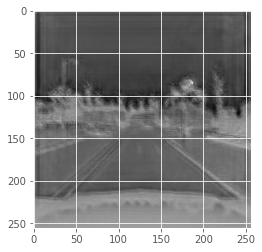

In [ ]:
pred = model(np.expand_dims(img, axis=0))
plt.imshow(pred[0,:,:,0], cmap="gray")


In [ ]:
images = np.zeros((len(image_paths), 256, 256, 3))
masks = np.zeros((len(image_paths), 256, 256, 1))

for idx, path in enumerate(image_paths):
    images[idx] = load_image(os.path.join(base_path, path))
    masks[idx, :, :, 0] = load_mask(os.path.join(seg_path, path))

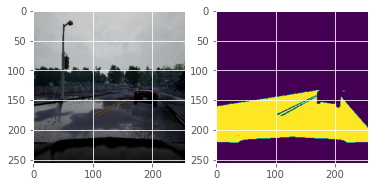

In [ ]:
fig, axs = plt.subplots(1, 2)

index = random.randint(0, len(image_paths))
axs[0].imshow(images[index])
axs[1].imshow(masks[index, :, :, 0])

In [ ]:
images = tf.convert_to_tensor(images)
masks = tf.convert_to_tensor(masks)

Epoch 1/30
32/32 [==============================] - 112s 2s/step - loss: 13.0963 - accuracy: 0.8057
Epoch 2/30
32/32 [==============================] - 63s 2s/step - loss: 0.5541 - accuracy: 0.8063
Epoch 3/30
32/32 [==============================] - 64s 2s/step - loss: 0.6194 - accuracy: 0.8063
Epoch 4/30
32/32 [==============================] - 64s 2s/step - loss: 0.3989 - accuracy: 0.8063
Epoch 5/30
32/32 [==============================] - 64s 2s/step - loss: 0.2565 - accuracy: 0.8063
Epoch 6/30
32/32 [==============================] - 64s 2s/step - loss: 0.2084 - accuracy: 0.8063
Epoch 7/30
32/32 [==============================] - 64s 2s/step - loss: 0.1848 - accuracy: 0.8178
Epoch 8/30
32/32 [==============================] - 64s 2s/step - loss: 0.1678 - accuracy: 0.9714
Epoch 9/30
32/32 [==============================] - 64s 2s/step - loss: 0.1623 - accuracy: 0.9738
Epoch 10/30
32/32 [==============================] - 64s 2s/step - loss: 0.1550 - accuracy: 0.9768
Epoch 11/30
32/32

Text(0.5, 1.0, 'Predicted Mask')

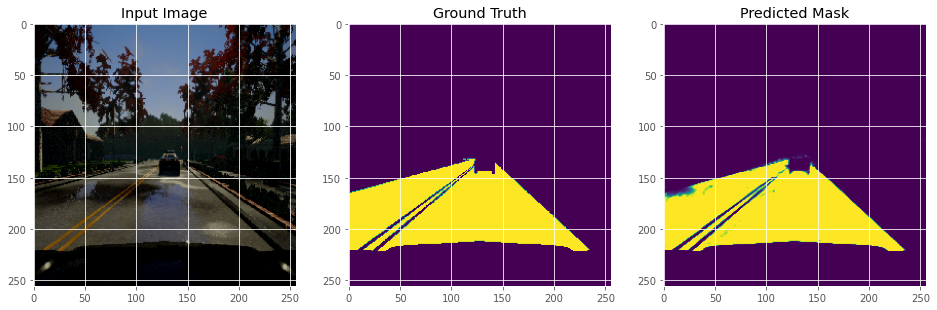

In [ ]:
index = random.randint(0, len(image_paths))

pred = model(np.expand_dims(images[index], axis=0))
fig, axs = plt.subplots(1, 3, figsize=(16, 16))
axs[0].imshow(images[index])
axs[1].imshow(masks[index,:,:,0])
axs[2].imshow(pred[0,:,:,0])

axs[0].set_title("Input Image")
axs[1].set_title("Ground Truth")
axs[2].set_title("Predicted Mask")